starting with the fetch the data from the verious resourcess

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

load the data from the csv file

In [3]:
df=pd.read_csv("train.csv")

load the data from the json file

In [ ]:
dat=pd.read_json("file name")

load the data from the sql

In [ ]:
!pip install mysql.connector

In [ ]:
conn=mysql.connector.connect(host="localhost" , user='root' , password='' , database='world')

In [7]:
df = pd.read_sql_query("SELECT * FROM countrylanguage",conn)

NameError: name 'conn' is not defined

fetch the data from the api

In [ ]:
response = requests.get('https://api.themoviedb.org/3/movie/top_rated?api_key=8265bd1679663a7ea12ac168da84d2e8&language=en-US&page=1')

In [ ]:
temp_df = pd.DataFrame(response.json()['results'])[['id','title','overview','release_date','popularity','vote_average','vote_count']]

fetch the data from the webscrape

In [ ]:

webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page=1').text


In [ ]:

soup=BeautifulSoup(webpage,'lxml')

In [ ]:

soup.find_all('h1')[0].text


In [ ]:

for i in soup.find_all('p'):
  print(i.text.strip())

In [ ]:
company=soup.find_all('div',class_='company-content-wrapper')


len(company)

In [ ]:

final=pd.DataFrame()
for j in range(1,1001):
  webpage=requests.get('https://www.ambitionbox.com/list-of-companies?page={}'.format(j)).text
  soup=BeautifulSoup(webpage,'lxml')
  company=soup.find_all('div',class_='company-content-wrapper')
  name=[]
  rating=[]
  reviews=[]
  ctype=[]
  hq=[]
  how_old=[]
  no_of_employee=[]

  for i in company:

    try:
       name.append(i.find('h2').text.strip())
    except:
       name.append(np.nan)

    try:
       rating.append(i.find('p',class_='rating').text.strip())
    except:
       rating.append(np.nan)

    try:

      reviews.append(i.find('a' , class_='review-count').text.strip())
    except:
      reviews.append(np.nan)

    try:

      ctype.append(i.find_all('p',class_='infoEntity')[0].text.strip())
    except:
      ctype.append(np.nan)
    try:

      hq.append(i.find_all('p',class_='infoEntity')[1].text.strip())
    except:
      hq.append(np.nan)

    try:

      how_old.append(i.find_all('p',class_='infoEntity')[2].text.strip())
    except:
      how_old.append(np.nan)
    try:
      no_of_employee.append(i.find_all('p',class_='infoEntity')[3].text.strip())
    except:
      no_of_employee.append(np.nan)


  df=pd.DataFrame({'name':name,
    'rating':rating,
    'reviews':reviews,
    'company_type':ctype,
    'Head_Quarters':hq,
    'Company_Age':how_old,
    'No_of_Employee':no_of_employee,
    })

  final=final.append(df,ignore_index=True)


pandas profiling

In [16]:
df.shape

(891, 12)

In [17]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,342


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [24]:
df.nunique()

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [25]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isin()

In [31]:
df.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
df.drop(columns=["column name"] , inplace = True)

In [26]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.head()

In [27]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<Axes: >

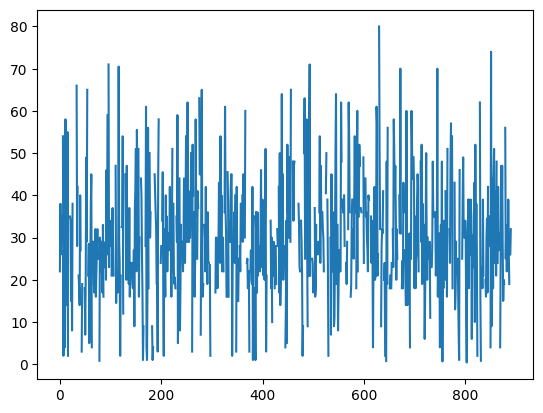

In [30]:
df["Age"].plot()

In [32]:
df["Age"].std()

14.526497332334044

In [33]:
df['Age'].min()

0.42

In [34]:
df["Age"].max()

80.0

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [38]:
df.fillna("okey")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,okey,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,okey,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,okey,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,okey,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,okey,1,2,W./C. 6607,23.4500,okey,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [40]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Age', ylabel='Pclass'>

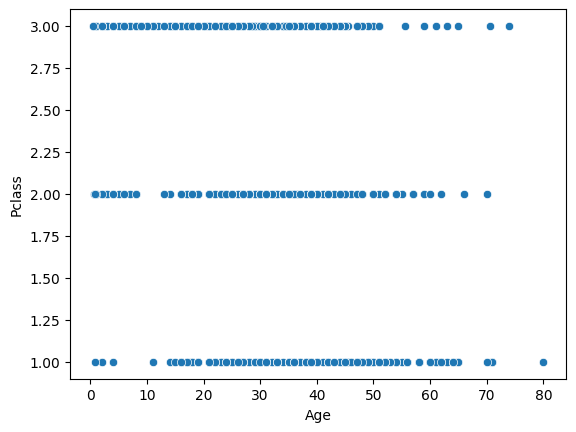

In [42]:
sns.scatterplot(df, x="Age" , y="Pclass" , )

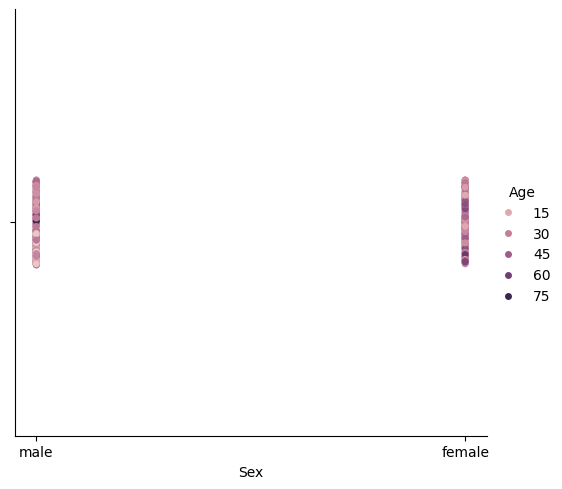

In [45]:
sns.catplot(df , x="Sex" , hue="Age")

<ipython-input-50-978e3d15d800>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"]);


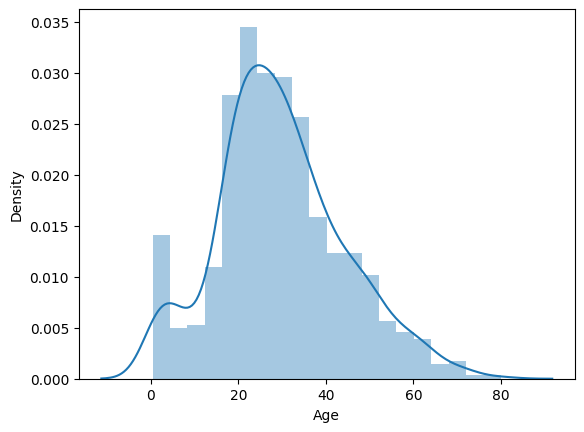

In [50]:
sns.distplot(df["Age"]);

<ipython-input-53-6525837c6049>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Survived"])


<Axes: xlabel='Survived', ylabel='Density'>

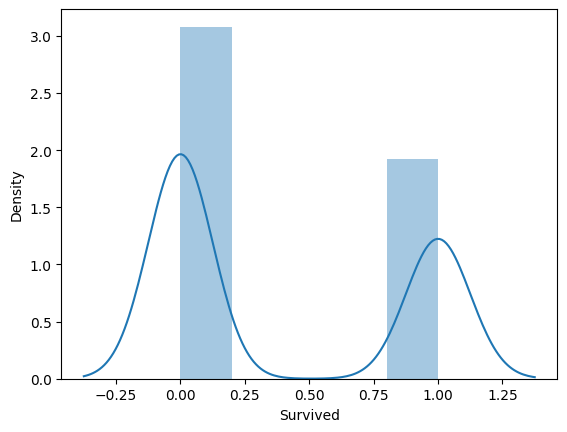

In [53]:
sns.distplot(df["Survived"])

<Axes: xlabel='Age', ylabel='Fare'>

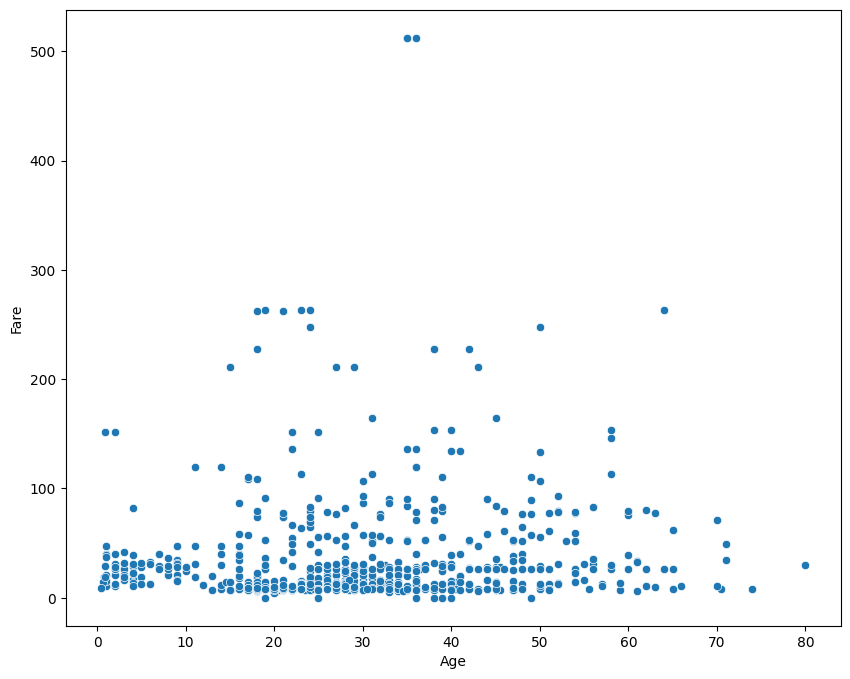

In [56]:
plt.figure(figsize=(10,8))
sns.scatterplot(df, x="Age" , y="Fare")

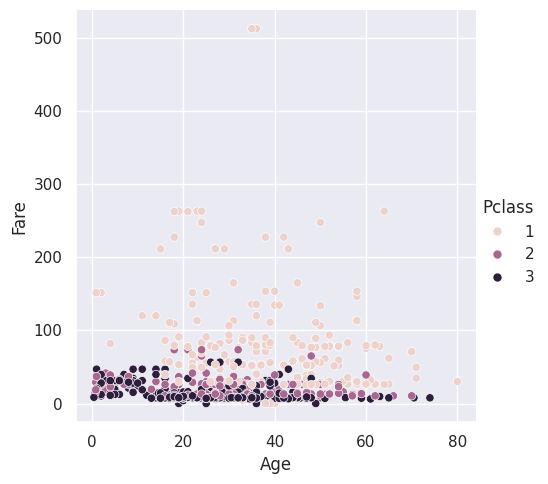

In [58]:
sns.set_theme(style="darkgrid")
sns.relplot(df ,x="Age" , y="Fare"  ,hue="Pclass")

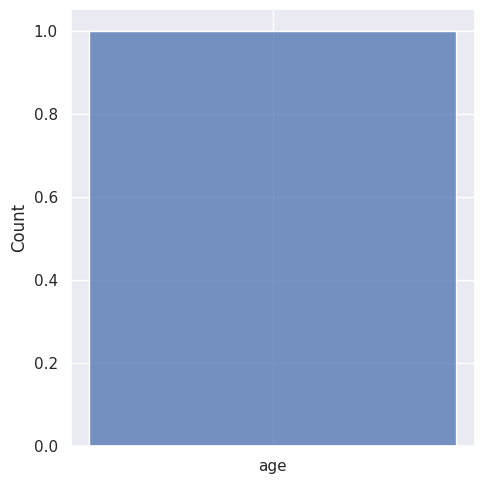

In [61]:
sns.displot("age")

<Axes: xlabel='Age', ylabel='Pclass'>

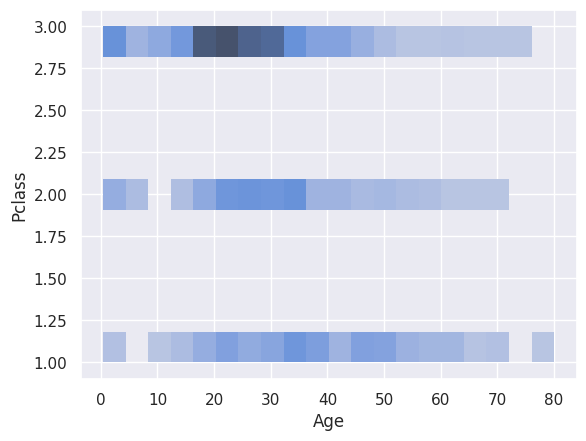

In [62]:
sns.histplot(df , x="Age" , y="Pclass")

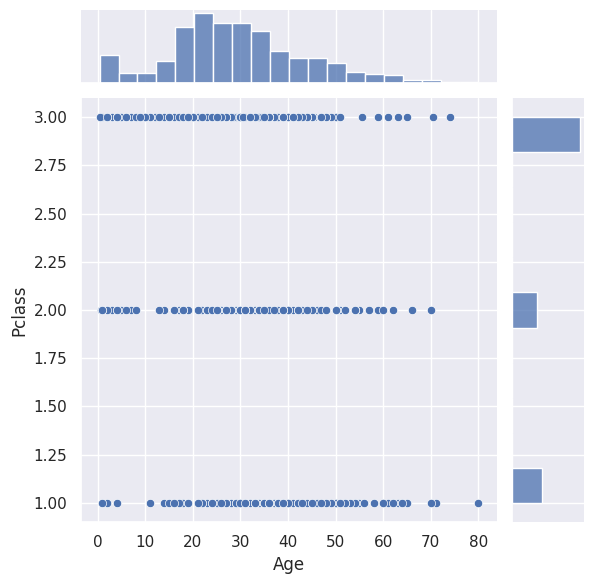

In [64]:
sns.jointplot(df , x="Age" , y="Pclass")

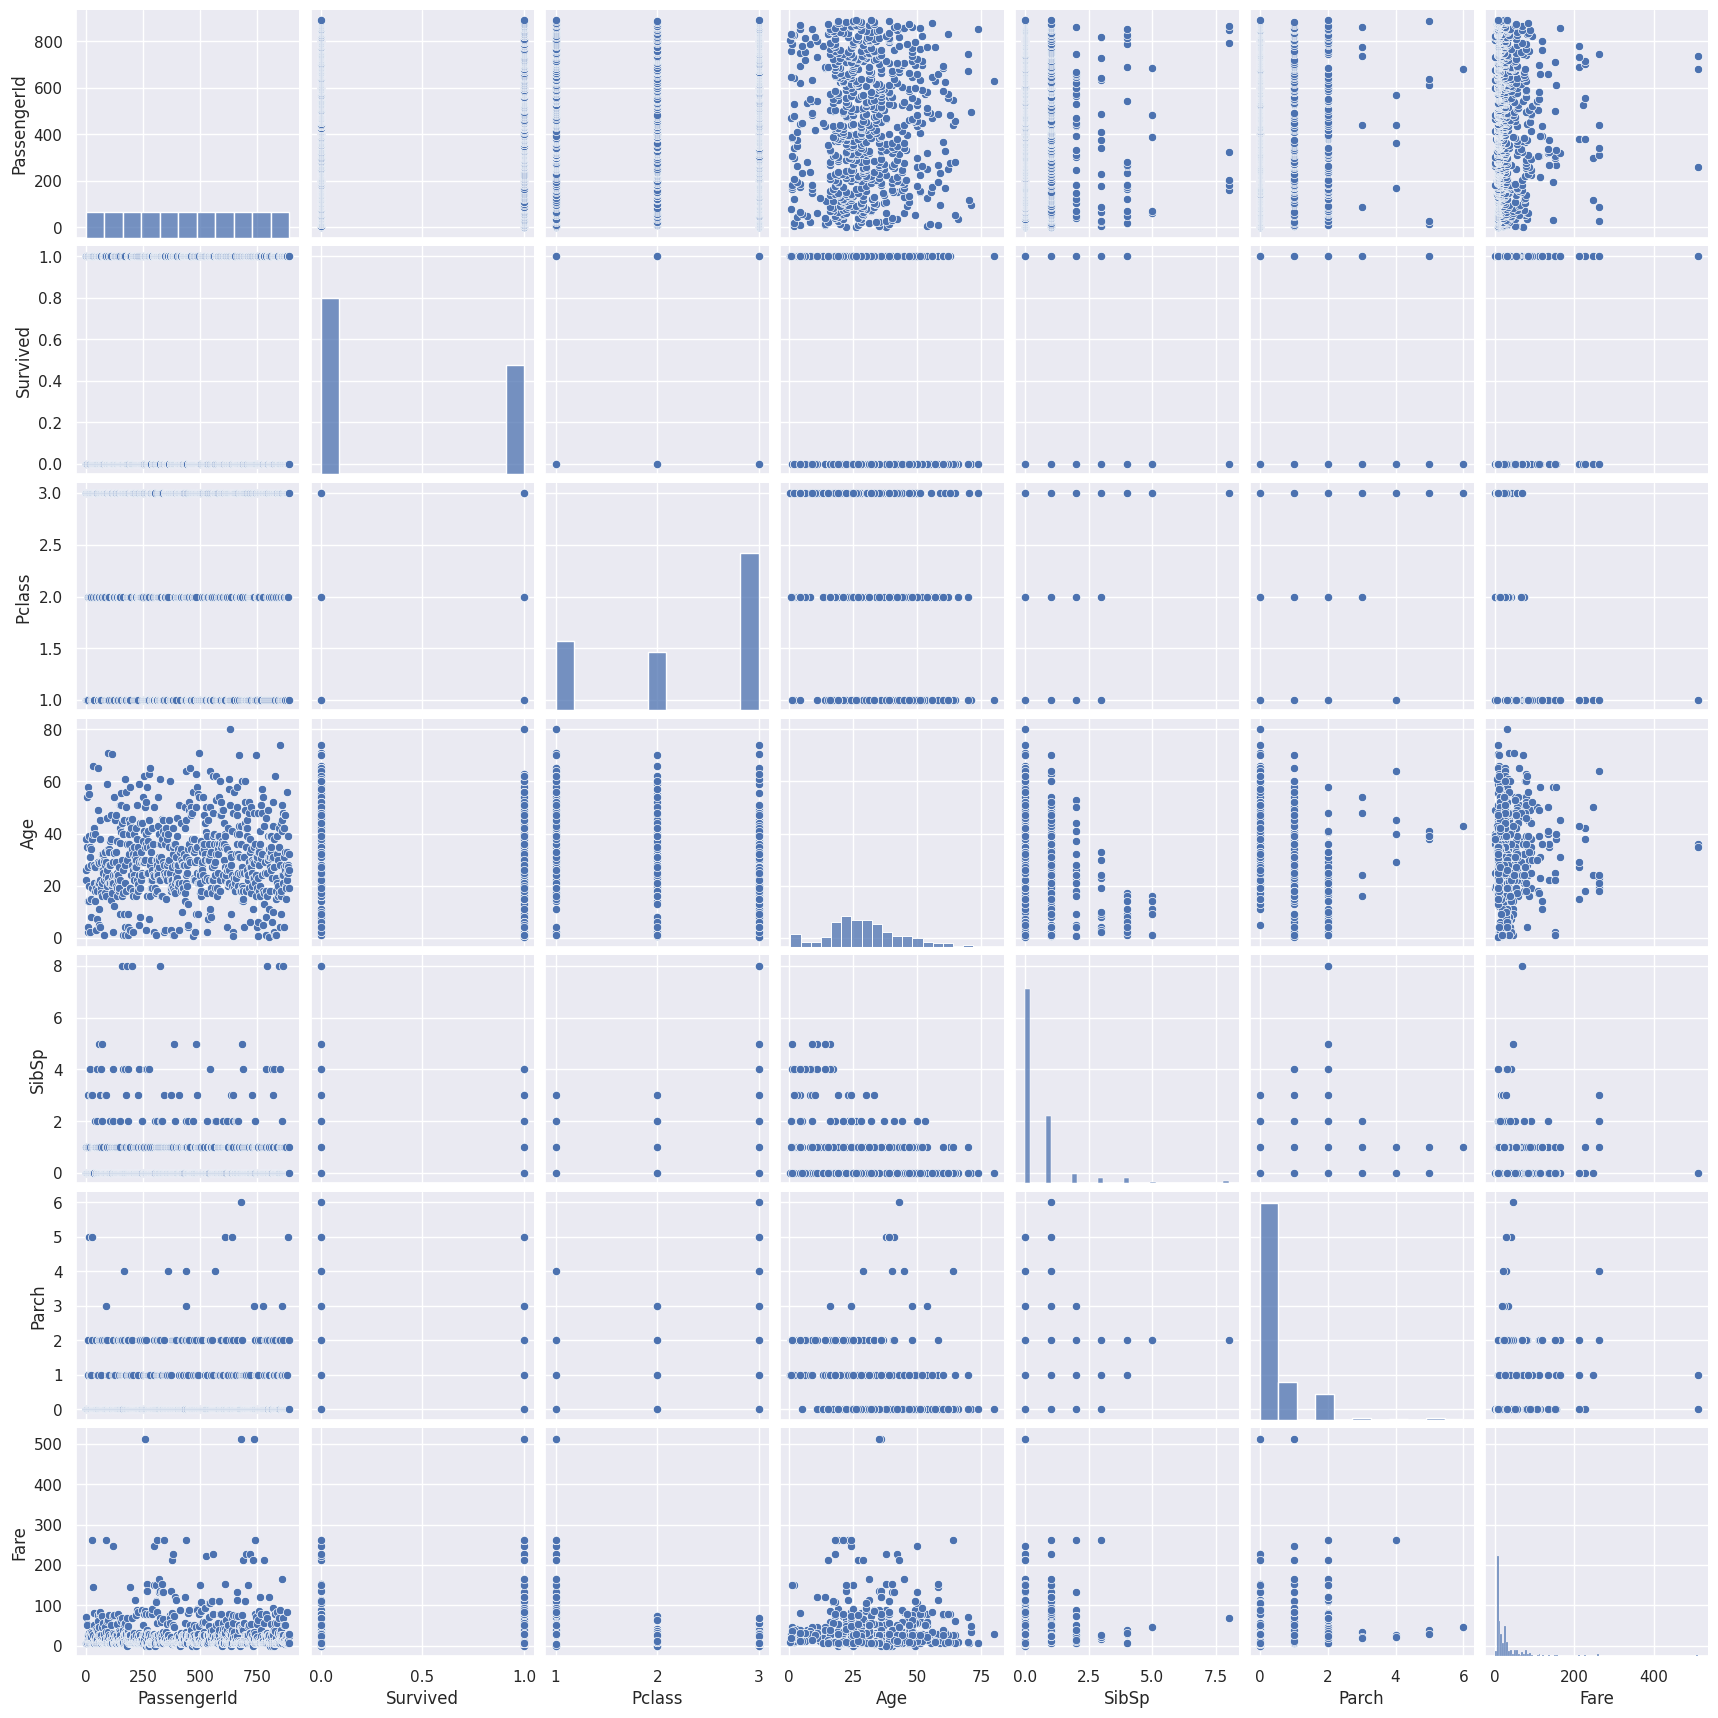

In [65]:
sns.pairplot(df)

<Axes: xlabel='Fare', ylabel='Density'>

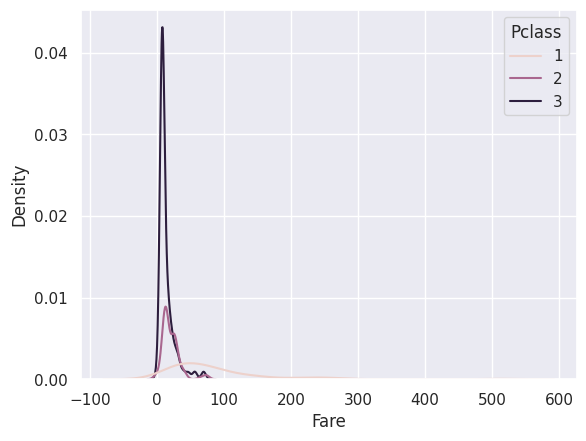

In [67]:
sns.kdeplot(df , x="Fare" , hue="Pclass" )

<Axes: xlabel='Pclass', ylabel='Density'>

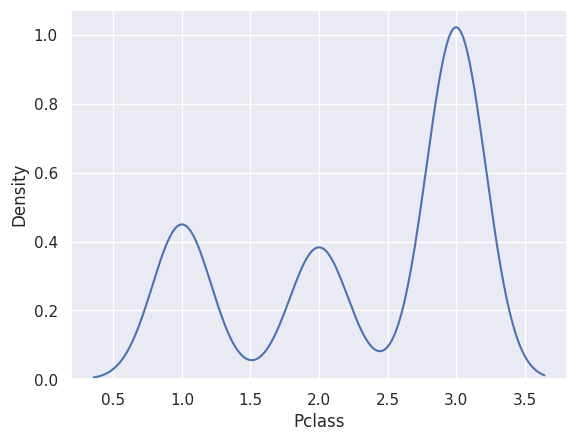

In [68]:
sns.kdeplot(df , x="Pclass")

<Axes: xlabel='Pclass', ylabel='Age'>

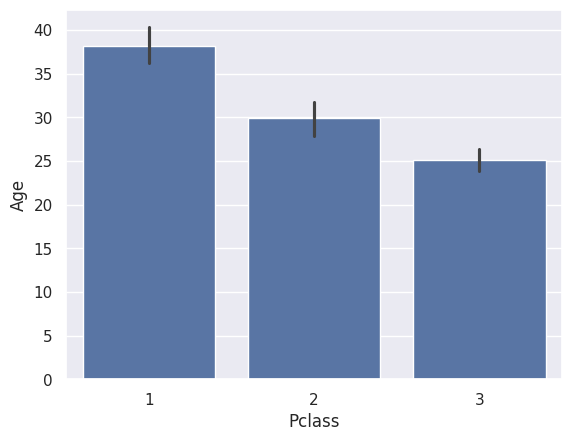

In [71]:
sns.barplot(df , x="Pclass" , y ="Age")

<ipython-input-4-9665bbf63f9d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Pclass"])


<Axes: xlabel='Pclass', ylabel='Density'>

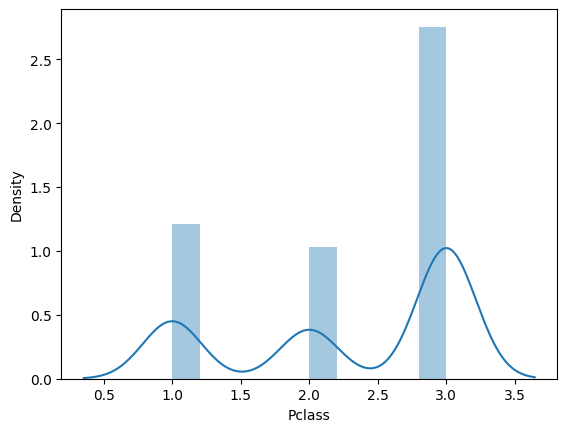

In [4]:
sns.distplot(df["Pclass"])

<ipython-input-5-5eb648105375>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

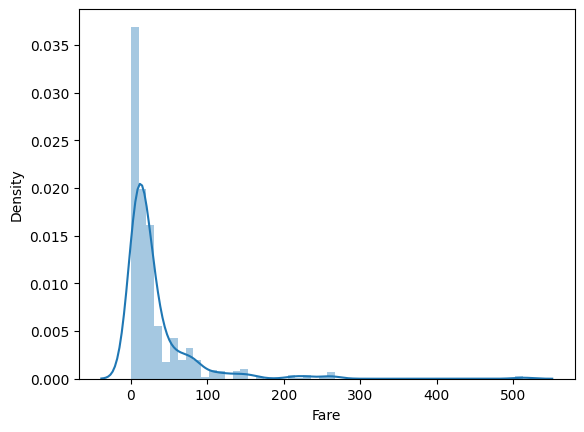

In [5]:
sns.distplot(df["Fare"])

DATA PREPROCESSING PHASE

splite the data into the dependent varible and the independent varible

In [ ]:
X =df.iloc[: ,:-1].values
y=df.iloc[: ,-1].values

devide the data for the training set and the test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train ,y_test=train_test_split(X ,y test_size=0.2 , random_state=0 )

in case of the standardition

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.fit_transform(X_test)

In [ ]:
from sklearn.preprocessing import Minmaxscaler
min=Minmaxscaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=["poor" , "good" ,"avg"] ["school", "collage", "PG"])
X_train = oe.fit_transform(X_train)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,-1]=le.fit_transform(X[:,-1])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[( "encoder", OneHotEncoder() , [])] , remainder="passthrough")

In [ ]:
from sklearn.impute import SimpleImputer
sc=SimpleImputer(strategy="mean")
X_train=sc.fit_transform(X_train)

In [ ]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

MACHINE LEARNING PIPELINE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier

In [ ]:
trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[2]),
    ('impute_embarked',SimpleImputer(strategy='most_frequent'),[6])
],remainder='passthrough')

In [ ]:
trf2 = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[1,6])
],remainder='passthrough')

In [ ]:
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [ ]:
# Feature selection
trf4 = SelectKBest(score_func=chi2,k=8)

In [ ]:

trf5 = DecisionTreeClassifier()

In [ ]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [ ]:
pipe.fit(X_train,y_train)

In [ ]:
# Code here
pipe.named_steps

In [ ]:
# Display Pipeline

from sklearn import set_config
set_config(display='diagram')
# Predict
y_pred = pipe.predict(X_test)

In [ ]:
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.0000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

In [ ]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

In [ ]:
pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

In [ ]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


In [ ]:
from sklearn.preprocessing import Binarizer
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['family'])
],remainder='passthrough')
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

In [ ]:
df['placement_exam_marks'].skew()
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

In [ ]:
# Finding the boundary values
print("Highest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("Lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

In [ ]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

In [ ]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df